# Entendendo o funcionamento do kNN

## Importação de módulos do Python

In [560]:
import numpy as np
from matplotlib import pyplot as plt

## Definição da matrix X de características (features)

In [561]:
X = np.array([[ 2.7810836 ,  2.550537  ],
       [ 1.46548937,  2.36212508],  
       [ 3.39656169,  4.40029353],  
       [ 1.38807019,  1.85022032],  
       [ 3.06407232,  3.00530597],  
       [ 7.62753121,  2.75926224],
       [ 5.33244125,  2.08862677],
       [ 6.92259672,  1.77106367],
       [ 8.67541865, -0.24206865],
       [ 7.67375647,  3.50856301]])

## Definição do vetor y de rótulos (labels)

In [562]:
y = np.array([ 0,  0, 0,  0,  0,  1,  1,  1,  1,  1])

## Gráfico dos dados onde queremos descobrir qual a classe no ponto (4, 1.5)

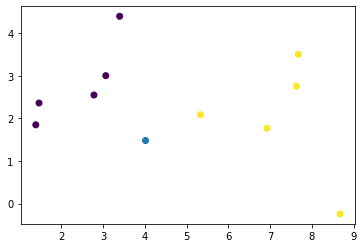

In [563]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(4, 1.5);

## Distância euclidiana
A distância euclidiana entre os pontos $ P=(p_{1},p_{2},\dots ,p_{n})$ e $Q=(q_{1},q_{2},\dots ,q_{n})$ em um espaço euclidiano n-dimensional, é definida como:

$$ \sqrt{ (p_{1}-q_{1})^{2} + (p_{2}-q_{2})^{2} + \cdots +(p_{n}-q_{n})^{2} } = \sqrt {\sum _{i=1}^{n}(p_{i}-q_{i})^{2}} $$

In [564]:
def euclidean_distances(X, X_row):
    X_ = (X - X_row) ** 2
    return np.sum(X_, axis=1) ** 0.5

## Obtenção dos $k$ vizinhos mais próximos

In [565]:
def get_neighbors(X_train, test_row, k):
    distances = euclidean_distances(X_train, test_row)
    idx_sort = np.argsort(distances)
    return idx_sort[:k]

## Classsificação de uma nova linha dado um valor de $k$

In [566]:
def predict_classification(X, y, test_row, k):
    idx_sort = get_neighbors(X, test_row, k)
    output_values = y[idx_sort]
    counts = np.unique(output_values, return_counts=True)
    idx_max = np.argmax(counts[1])
    prediction = counts[0][idx_max]
    print('idx_sort:{}, output_values:{}, prediction:{}'.format(idx_sort, output_values, prediction))
    return prediction

### Qual a classe do ponto $(4, 1.5)$ considerando apenas o vizinho mais próximo ($k=1$)?

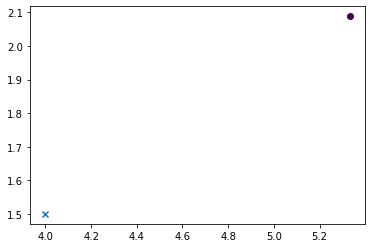

In [567]:
q = np.array([4, 1.5])
idx_sort = get_neighbors(X, q, 1)
plt.scatter(X[idx_sort, 0], X[idx_sort, 1], c=y[idx_sort])
plt.scatter(q[0], q[1], marker='x');

In [568]:
predict_classification(X, y, np.array([4, 1.5]), 1)

idx_sort:[6], output_values:[1], prediction:1


1

#### Resposta: classe 1

### Qual a classe do ponto $(4, 1.5)$ considerando os 3 vizinhos mais próximos ($k=3$)?

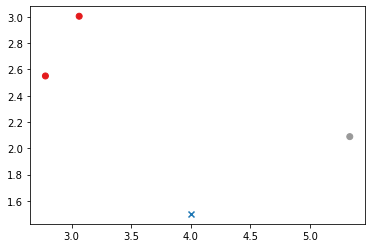

In [569]:
k = 3
q = np.array([4, 1.5])
idx_sort = get_neighbors(X, q, k)
plt.scatter(X[idx_sort, 0], X[idx_sort, 1], c=y[idx_sort], cmap='Set1')
plt.scatter(q[0], q[1], marker='x');

In [574]:
predict_classification(X, y, np.array([4, 1.5]), k)

idx_sort:[6 0 4], output_values:[1 0 0], prediction:0


0

#### Resposta: classe 1

## 1. Resolver a classificação do Iris dataset para k=3 e k=5 com essas funções que implementamos no documento colab. Usando 70% dos dados para treino e 30% para teste. Ou seja: não é para usar a implementação do scikit para o kNN, nem o split_train_test do scikit.

In [571]:
# creating an array with all features and labels
dataset = []
for idx in range(len(X)) :
    dataset.append(np.array([X[idx][0], X[idx][1], y[idx]]))
dataset = np.array(dataset)

# separete between the existing 2 classes
dsClasse0 = dataset[:5]
dsClasse1 = dataset[5:]

# shuffle the values of each class
np.random.shuffle(dsClasse0)
np.random.shuffle(dsClasse1)

# Divide 70% of the data for training
train_per = len(X)*0.7
up = int(np.ceil(train_per/2))
down = int(np.floor(train_per/2))

# create the train and test datasets
train_dataset = np.concatenate((dsClasse0[:down], dsClasse1[:up]), axis=0)
print(train_dataset)
test_dataset = np.concatenate((dsClasse0[down:], dsClasse1[up:]), axis=0)
print(test_dataset)


[[ 1.46548937  2.36212508  0.        ]
 [ 2.7810836   2.550537    0.        ]
 [ 1.38807019  1.85022032  0.        ]
 [ 5.33244125  2.08862677  1.        ]
 [ 8.67541865 -0.24206865  1.        ]
 [ 7.62753121  2.75926224  1.        ]
 [ 7.67375647  3.50856301  1.        ]]
[[3.06407232 3.00530597 0.        ]
 [3.39656169 4.40029353 0.        ]
 [6.92259672 1.77106367 1.        ]]


In [572]:
# formating the train dataset to fit the parameter of get_neighbors function
X_train = []
y_train = []
for idx in range(len(train_dataset)) :
    X_train.append(np.array([train_dataset[idx][0], train_dataset[idx][1]]))
    y_train.append(int(train_dataset[idx][2]))
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train)
print(y_train)
print(train_dataset)

[[ 1.46548937  2.36212508]
 [ 2.7810836   2.550537  ]
 [ 1.38807019  1.85022032]
 [ 5.33244125  2.08862677]
 [ 8.67541865 -0.24206865]
 [ 7.62753121  2.75926224]
 [ 7.67375647  3.50856301]]
[0 0 0 1 1 1 1]
[[ 1.46548937  2.36212508  0.        ]
 [ 2.7810836   2.550537    0.        ]
 [ 1.38807019  1.85022032  0.        ]
 [ 5.33244125  2.08862677  1.        ]
 [ 8.67541865 -0.24206865  1.        ]
 [ 7.62753121  2.75926224  1.        ]
 [ 7.67375647  3.50856301  1.        ]]


### Para K=3

[[ 1.46548937  2.36212508]
 [ 2.7810836   2.550537  ]
 [ 1.38807019  1.85022032]
 [ 5.33244125  2.08862677]
 [ 8.67541865 -0.24206865]
 [ 7.62753121  2.75926224]
 [ 7.67375647  3.50856301]]
[1 0 2]
[2.7810836  1.46548937 1.38807019]
[2.550537   2.36212508 1.85022032]


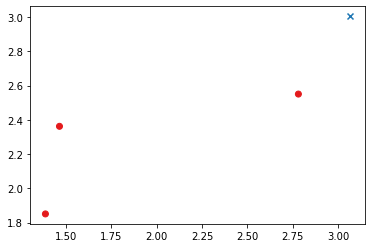

[[ 1.46548937  2.36212508]
 [ 2.7810836   2.550537  ]
 [ 1.38807019  1.85022032]
 [ 5.33244125  2.08862677]
 [ 8.67541865 -0.24206865]
 [ 7.62753121  2.75926224]
 [ 7.67375647  3.50856301]]
[1 0 3]
[2.7810836  1.46548937 5.33244125]
[2.550537   2.36212508 2.08862677]


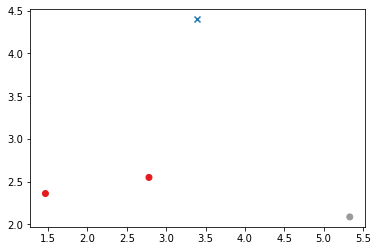

[[ 1.46548937  2.36212508]
 [ 2.7810836   2.550537  ]
 [ 1.38807019  1.85022032]
 [ 5.33244125  2.08862677]
 [ 8.67541865 -0.24206865]
 [ 7.62753121  2.75926224]
 [ 7.67375647  3.50856301]]
[5 3 6]
[7.62753121 5.33244125 7.67375647]
[2.75926224 2.08862677 3.50856301]


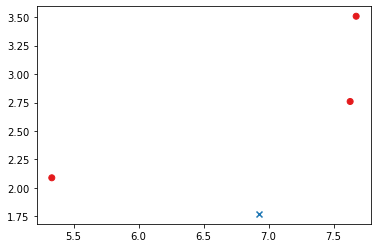

<Figure size 432x288 with 0 Axes>

In [573]:
k = 3
for data in test_dataset :
    q = np.array([data[0], data[1]])
    idx_sort = get_neighbors(X_train, q, k)
    plt.scatter(X_train[idx_sort, 0], X_train[idx_sort, 1], c=y_train[idx_sort], cmap='Set1')
    plt.scatter(q[0], q[1], marker='x');
    print(X_train)
    print(idx_sort)
    print(X_train[idx_sort, 0])
    print(X_train[idx_sort, 1])
    plt.show()
    plt.clf()